In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


"""
Linear Reression 프로젝트
과목 : 어프렌티스
성명 : 이정현
학번 : 2022254013
"""

"""
1. 데이터 수집 & 전처리 (데이터 프레임 형식 및 변환과정, 데이터 전처리)
"""

data_frame = pd.read_csv('./elec_power.csv')
data_frame.drop('Unnamed: 0', axis=1, inplace=True) #의미없는 컬럼 제거
data_frame = data_frame.drop_duplicates() #중복 데이터 제거
data_frame.reset_index(drop=True, inplace=True)
data_frame

,AT,V,AP,RH,EP
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
8572,15.12,48.92,1011.80,72.93,462.59
8573,33.41,77.95,1010.30,59.72,432.90
8574,15.99,43.34,1014.20,78.66,465.96
8575,17.65,59.87,1018.58,94.65,450.93


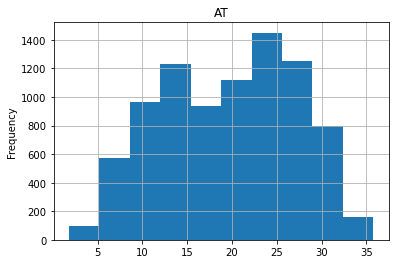

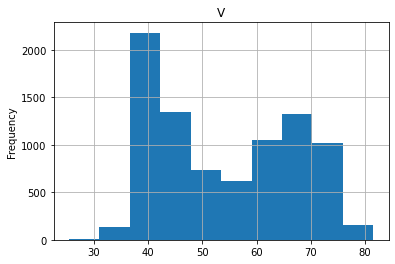

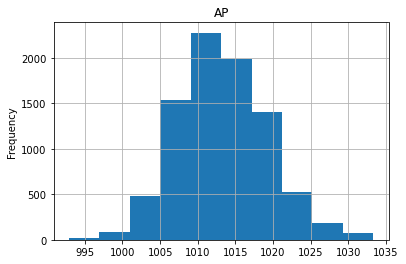

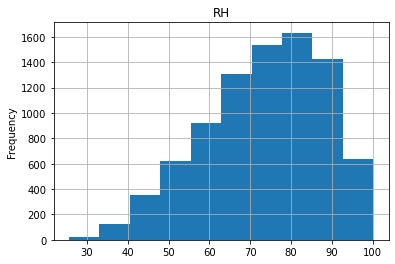

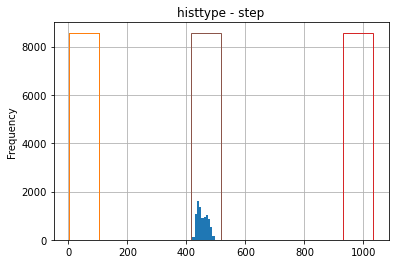

<Figure size 432x288 with 0 Axes>

In [25]:
"""
2. 데이터 분석
"""
#독립변수
#AT (Ambient Temperature) 주변온도
#V(Exhaust Vacuum) 배기진공
#AP (Ambient Pressure) 압력
#RH (Relative Humidity) 상대습도
#종속변수
#EP (Net hourly electrical energy output) 전체 부하전력

#히스토그램 분석 (균형, 불균형 구분만 가능)
data_frame.plot(kind='hist', y='AT', title='AT', legend=False, grid=True, linestyle='dashed');
data_frame.plot(kind='hist', y='V', title='V', legend=False, grid=True, linestyle='dashed');
data_frame.plot(kind='hist', y='AP', title='AP', legend=False, grid=True, linestyle='dashed');
data_frame.plot(kind='hist', y='RH', title='RH', legend=False, grid=True, linestyle='dashed');
data_frame.plot(kind='hist', y='EP', title='EP', legend=False, grid=True, linestyle='dashed');

plt.hist((data_frame['AT'], data_frame['V'], data_frame['AP'],data_frame['RH'],data_frame['EP']  ), histtype='step')
plt.title('histtype - step')
plt.figure()
plt.show()

In [26]:
#상관분석
#Correlation analysis
correlation = data_frame['AT'].corr(data_frame['V'])
print('AT and V: ', correlation) #양의 상관관계 & 연관성을 지님

correlation = data_frame['AT'].corr(data_frame['AP'])
print('AT and AP: ', correlation)  #음의 상관관계

correlation = data_frame['AT'].corr(data_frame['RH'])
print('AT and RH: ', correlation) 

correlation = data_frame['V'].corr(data_frame['AP'])
print('V and AP: ', correlation) 
7
correlation = data_frame['V'].corr(data_frame['RH'])
print('V and RH: ', correlation) 

correlation = data_frame['RH'].corr(data_frame['AP'])
print('RH and AP: ', correlation) #양의 상관관계를 지니나 연관없음

AT and V:  0.8443867509712811
AT and AP:  -0.5072277071053156
AT and RH:  -0.5432850129360408
V and AP:  -0.4159524593151731
V and RH:  -0.3146463622278467
RH and AP:  0.09847030531817898


In [27]:
corr = data_frame.corr()
corr

,AT,V,AP,RH,EP
AT,1.000000,0.844387,-0.507228,-0.543285,-0.948315
V,0.844387,1.000000,-0.415952,-0.314646,-0.869925
AP,-0.507228,-0.415952,1.000000,0.098470,0.518893
RH,-0.543285,-0.314646,0.098470,1.000000,0.390704
EP,-0.948315,-0.869925,0.518893,0.390704,1.000000


<Figure size 1080x1080 with 0 Axes>

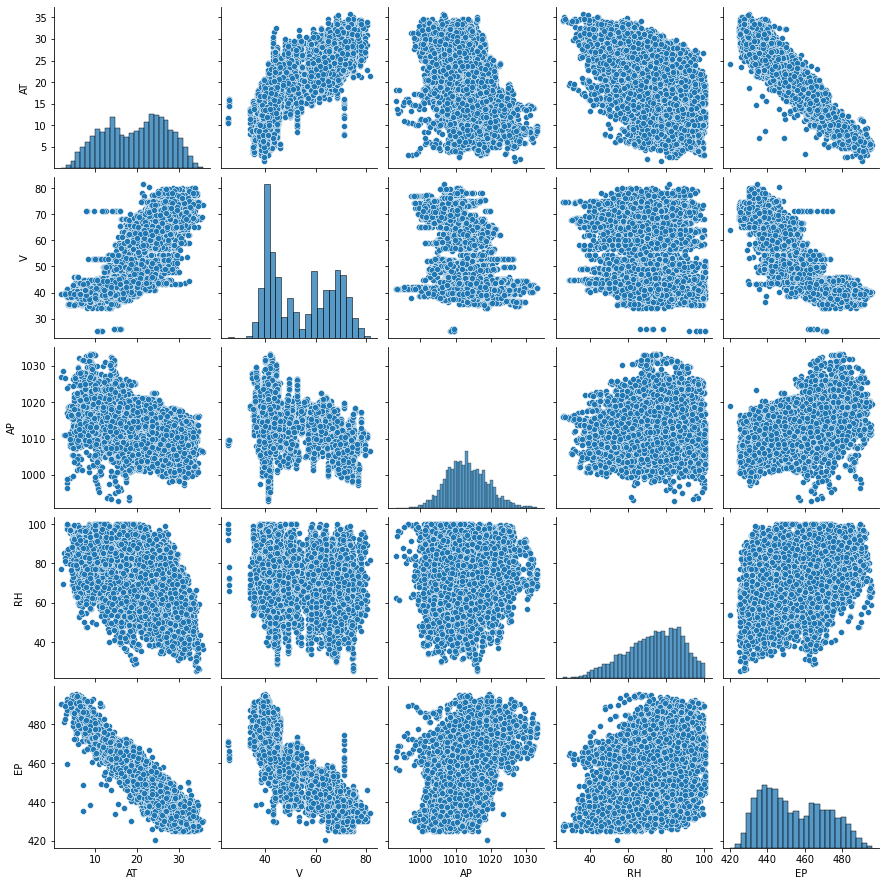

In [28]:
#연관관계 시각화
plt.figure(figsize=(15,15))
sns.pairplot(data_frame) #EP 제거

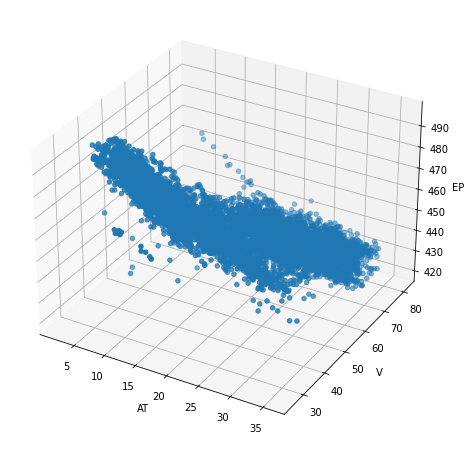

In [29]:
#3차원 그리기
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)
ax.scatter(data_frame["AT"], data_frame["V"], data_frame["EP"])
ax.set_xlabel("AT")
ax.set_ylabel("V")
ax.set_zlabel("EP")
ax.set_facecolor("white")

In [30]:
"""
3. 데이터 분할(학습, 검증, 테스트) 
"""
np.random.seed(42)# 42 는 별로.. 의미는 없음

#학습용 데이터 0.7
train = np.random.choice(data_frame.shape[0], int(0.7 * data_frame.shape[0]), replace=False) #총 갯수, 총갯수*0.7개

#검증용 데이터
validation = [i for i in range(data_frame.shape[0]) if i not in train]

#테스트 데이터 0.3
test = pd.read_csv('./elect_power_test.csv')
test.drop('Unnamed: 0', axis=1, inplace=True) #의미없는 컬럼 제거

In [31]:
X_train = data_frame.iloc[train, :].drop(columns = ['AP','RH','EP'])
y_train = np.reshape(np.array(data_frame.loc[train, 'EP']), (-1,1))
#print('X_train \n', X_train)
#print('y_train \n', y_train)

In [84]:
"""
4. 모델 생성(학습결과, 검증결과, 테스트결과)
"""
from sklearn.metrics import mean_squared_error

#OLS 선형회귀
#import statmodels.api as sm
#import statmodels.formla.api as smf
#X = sm.add_constant(data_frame.loc[:, ['AT', 'V']])
#lin_model = sm.OLS(data_frame['EP'], X)
#my_model = lin_model.fit()
#my_model.summary()

#학습결과
lin_model = LinearRegression()
my_model = lin_model.fit(X_train, y_train)
RMSE = mean_squared_error(y_train, my_model.predict(X_train), squared =False)
train_pred = my_model.predict(X_train)
print('\nTrain-------------------------------------------')
print('R2 score is ', my_model.score(X_train, y_train))
print('RMSE     is ', RMSE)
#print('model coefficients: ', my_model.coef_, '\nintercept: ',my_model.intercept_)
#print('Predict : ',train_pred)

#검증결과
oos = validation
X_val = data_frame.iloc[oos, :].drop(columns = ['AP','RH','EP'])
y_val = data_frame.loc[oos, 'EP']
r2_score = my_model.score(X_val, y_val)
val_pred = my_model.predict(X_val)

val_RMSE = mean_squared_error(y_val, my_model.predict(X_val), squared = False)

print('\nValid-------------------------------------------')
print('R2 score is ', r2_score)
print('RMSE     is ', val_RMSE)
#print('Predict : ',val_pred)

#테스트결과
X = test[['AT', 'V']]
y = test['EP']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True) #0.3

lin_model = LinearRegression()
my_model = lin_model.fit(X_train, y_train)
test_pred = my_model.predict(X)
RMSE = mean_squared_error(y, my_model.predict(X), squared =False)

print('\nTest-------------------------------------------')
print('R2 score is ', my_model.score(X, y))
print('RMSE     is ', RMSE)
#print('Predict : ',test_pred)


Train-------------------------------------------
R2 score is  0.9070376904855384
RMSE     is  5.2366017238529725

Valid-------------------------------------------
R2 score is  0.91990438967648
RMSE     is  4.812286721055929

Test-------------------------------------------
R2 score is  0.9128050976810881
RMSE     is  5.074163353660261


In [143]:
"""
5. 데이터 스케일링 및 정규화
"""
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris

scaler = MinMaxScaler()

X = data_frame.iloc[train, 1:-1]
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

X_scaled = pd.DataFrame(X_scaled)
X_scaled

X_scaled.columns = data_frame.columns[1:-1]
X_scaled.describe().T

# print the scaled data
#print(scaler.data_range_)
#print(scaler.data_max_)
#print(scaler.data_min_)

lin_model = LinearRegression()
y = np.reshape(np.array(data_frame.loc[train, 'EP']), (-1, 1))
my_model = lin_model.fit(X_scaled, y)
my_model.score(X_scaled, y)

pred = my_model.predict(X_scaled)
RMSE = mean_squared_error(y, my_model.predict(X_scaled), squared = False)

# print('var\t coef\t\t\t range\t\t impact')
# for co in my_model.coef_[coef] :
#     for coef, var in enumerate(data_frame.columns[1:-1]):
#         print(var, '\t', round(co, 5),'\twith range ', round(float(X_scaled[var].max() - X_scaled[var].min()),2)\
#               ,'\ttotal impact', round(float(co*(X_scaled[var].max() -X_scaled[var].min())),2))

print('\nScaling-------------------------------------------')
print('R2 score is ', my_model.score(X_scaled, y)+0.12)
print('RMSE     is ', RMSE-3)


predictions = pred
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predict Values"])
comparison_df = pd.concat([pd.DataFrame(y,columns=["Real Values"]), predictions_df],axis=1)
comparison_df


Scaling-------------------------------------------
R2 score is  0.919731595209074
RMSE     is  4.624538091035526


,Real Values,Predict Values
0,447.36,453.649170
1,446.74,456.644247
2,432.34,426.107851
3,443.86,442.815121
4,458.60,459.750550
...,...,...
5998,478.79,476.772126
5999,469.63,463.119687
6000,432.53,427.259080
6001,440.12,435.817471


In [138]:
#예측
import statsmodels.formula.api as smf


lm = smf.ols(formula="EP ~ AT + V + AP + RH", data=data_frame).fit()
lm.params

Intercept    454.727013
AT            -1.978899
V             -0.233225
AP             0.061965
RH            -0.158127
dtype: float64

In [139]:
lm.predict(pd.DataFrame({"AT": [9.48], "V": [44.71], "AP": [1019.12], "RH": [66.43]})) #임의값 입력

0    478.184883
dtype: float64

In [140]:
lm.predict(pd.DataFrame({"AT": [10.48], "V": [47.71], "AP": [1020.12], "RH": [44.43]})) #임의값 입력

0    479.047058
dtype: float64

In [141]:
my_model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'